Data Set Information:

   The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.
   
   The device was located on the field in a significantly polluted area, at road level,within an Italian city. 
   
   Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. 
  
   Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 
   
   Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. 
  
  Missing values are tagged with -200 value. 
    
**This dataset can be used exclusively for research purposes.

Attribute Information:

0 Date	(DD/MM/YYYY) 

1 Time	(HH.MM.SS) 

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	

7 True hourly averaged NOx concentration in ppb (reference analyzer) 

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

12 Temperature in Â°C	

13 Relative Humidity (%) 

14 AH Absolute Humidity 

In [65]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#importing the data set
df = pd.read_csv('G:/data/dataset/Air_quality/AirQualityUCI.csv',sep=';',decimal=b',')
#Here in this data set , the datas are separated by ';'
#And in certain data points the ","is used for decimal

# Preprocessing  &  Analysing

In [67]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,","
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
,,,,,            2556 non-null object
dtypes: float64(14), object(3)
memory usage: 1.2+ MB


The range index gives 9471 entries while actually the non-null entries are 9357  ,so we have a problem here my friends.

In [69]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"


In [70]:
#Checking for NA values
df.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
Unnamed: 15      True
,,,,,            True
dtype: bool

# Visualization of missing values

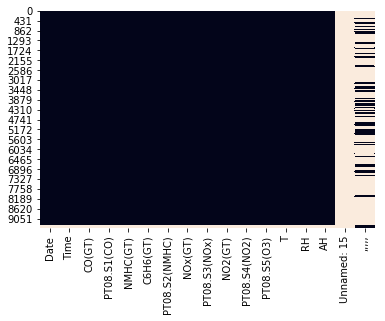

In [71]:
sns.heatmap(df.isnull(), cbar=False)

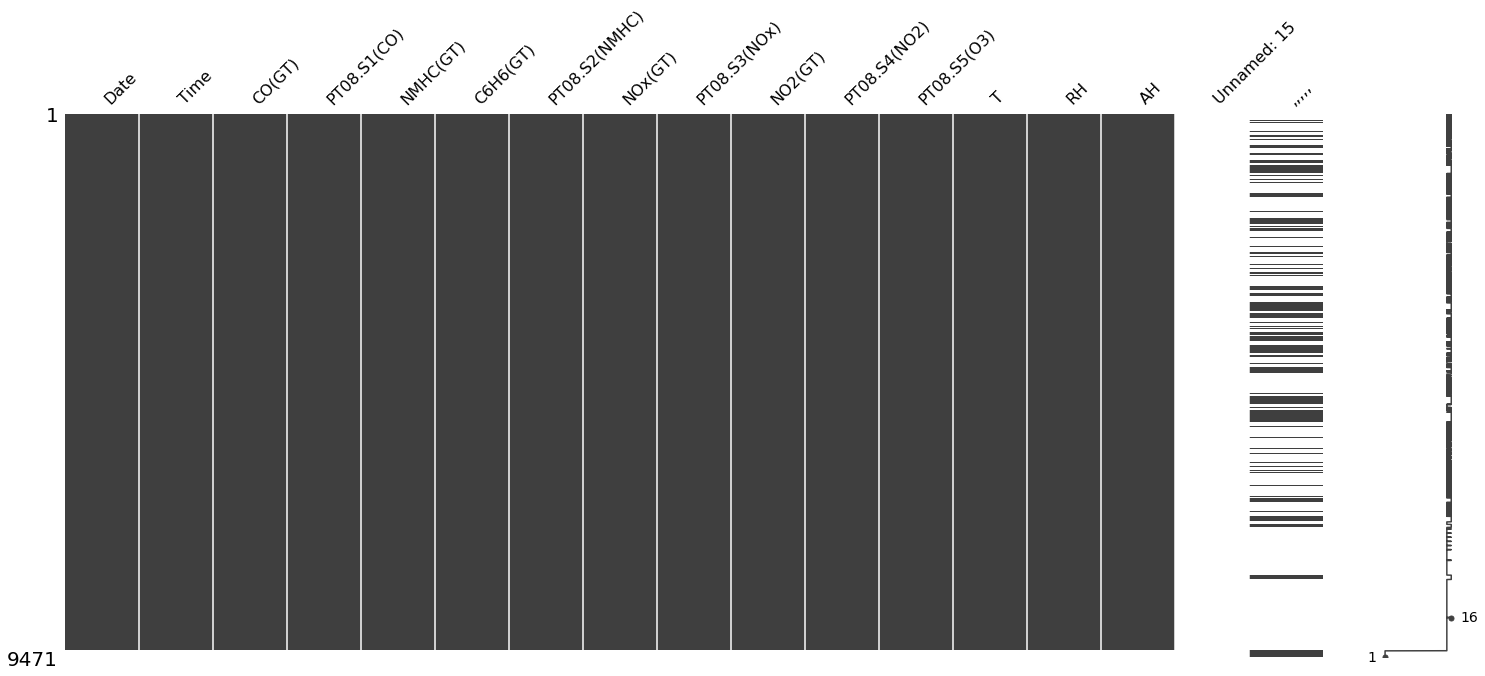

In [72]:
#using missingno
import missingno as msno
msno.matrix(df)

In [73]:
df.iloc[9356:9366,:]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"


In [74]:
#dropping the  NA values

# Keep only the rows which contain 7 missing values maximum
df.dropna(thresh=7,inplace=True)

In [75]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
,,,,,            2442 non-null object
dtypes: float64(14), object(3)
memory usage: 1.3+ MB


In [77]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN


In [78]:
# Are there null values in the dataframe?
#x is the dataframe
cols_null_counts = df.apply(lambda x: sum(x.isnull()))
print('number of columns with null values:', len(cols_null_counts[cols_null_counts != 0]))

number of columns with null values: 2


In [79]:
df[',,,,,'].unique()

array([nan, ',', ',,,', ',,,,'], dtype=object)

In [80]:
df.drop([',,,,,','Unnamed: 15'],axis=1,inplace=True)

In [81]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

So, now we almost removed most of the null rows and null columns.

but there are still NA values inbetween the data points which are encoded with '-200'.

Here we can't directly remove the columns or rows which has null values (i.e,most of the information will be lost), instead of removing we can replace it .

There are several methods two replace the NA values .I am thinking about using some model to predict the NA values.

In [82]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [83]:
#Replacing -200 with NAN 
df.replace(-200,np.NaN,inplace=True)

In [84]:
#Sum of the NA values 
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

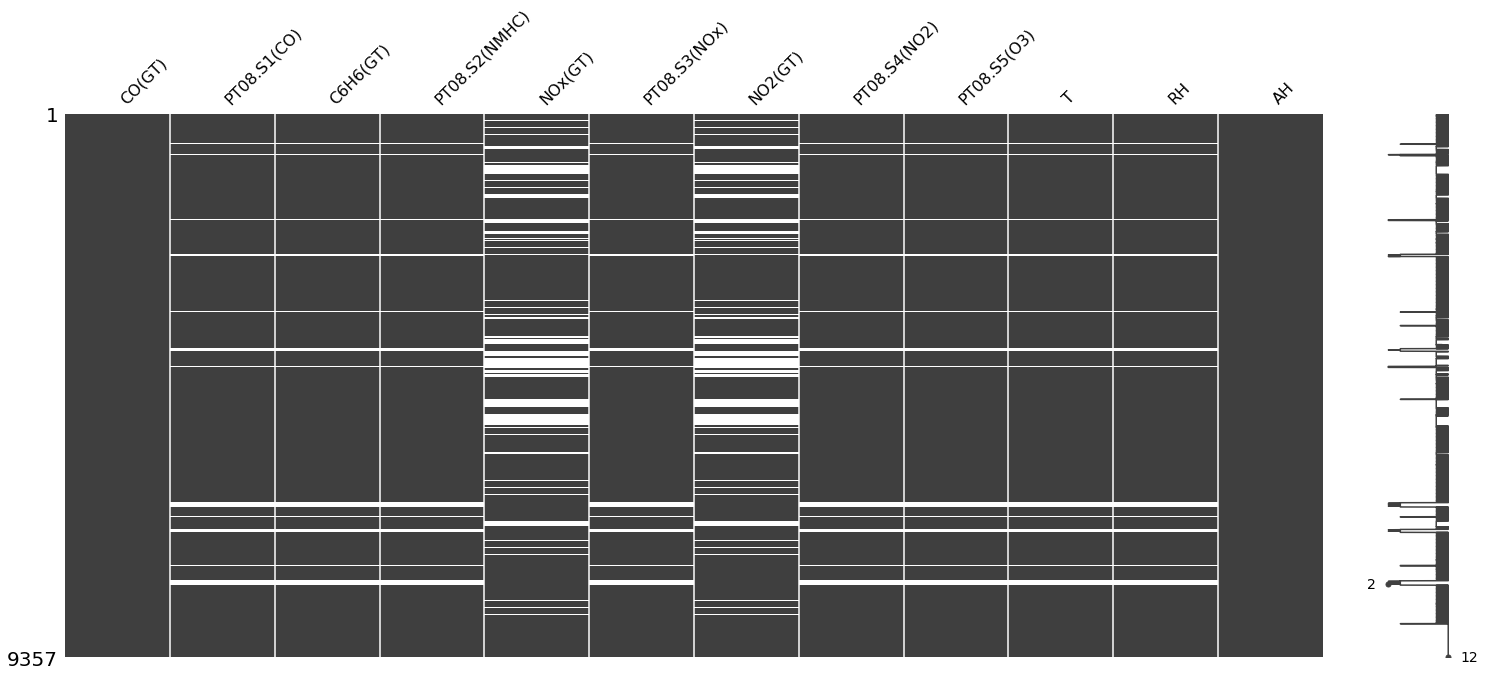

In [136]:
#using missingno
import missingno as msno
msno.matrix(df)

OMG! that's lot of missing values...........

NMHC : 90% NA values

CO(GT) : nearly 18% NA values

NOx(GT) : nearly 18% NA values

NO2(GT) : nearly 18% NA values

PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH : nearly 5% NA values

In [85]:
df_dt = df.iloc[:,1:3]
df_dt.head()

,Time,CO(GT)
0,18.00.00,2.6
1,19.00.00,2.0
2,20.00.00,2.2
3,21.00.00,2.2
4,22.00.00,1.6


In [86]:
#Dropping the NMHC(GT) as it has huge no.of NAN values
df.drop(['NMHC(GT)'],inplace = True,axis = 1)

#Dropping Date and time
df.drop(['Date','Time'],inplace = True,axis = 1)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 12 columns):
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(12)
memory usage: 950.3 KB


There are several strategies for imputing the NAN values .Such as,

Using RandomForest,linear regression these algorithms are good but at the same time they are high time consuming.

Mostly the Tree based algorithms don't care if there is missing values.

Importing imputer from scikit learn, etc.

KNN algorithm is widely used for this ,
but unfortunately the KNN algorithm built in the Scikit learn does not support this process much.

I'm thinking of implementing the different strategies for imputing the NA values.Just to have an idea how it is done.

In this data set, there is no exact target variable.

But I'm really interested to see how the air pollutants involve in the temperature changes

In [88]:
#calculating the variance
df.var(axis=0)

CO(GT)                2.111941
PT08.S1(CO)       47123.742575
C6H6(GT)             55.499814
PT08.S2(NMHC)     71199.011290
NOx(GT)           45360.126046
PT08.S3(NOx)      65955.135860
NO2(GT)            2339.667327
PT08.S4(NO2)     119859.143884
PT08.S5(O3)      158789.727561
T                    78.006268
RH                  299.874765
AH                    0.163065
dtype: float64

In [89]:
#Calculating the standard deviation
df.std()

CO(GT)             1.453252
PT08.S1(CO)      217.080037
C6H6(GT)           7.449820
PT08.S2(NMHC)    266.831429
NOx(GT)          212.979168
PT08.S3(NOx)     256.817320
NO2(GT)           48.370108
PT08.S4(NO2)     346.206794
PT08.S5(O3)      398.484288
T                  8.832116
RH                17.316892
AH                 0.403813
dtype: float64

In [90]:
#Statistical analysis
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


We can impute the NAN values for the columns of low variance and Standard deviation.

In the columns with low standard deviation , data point occurs near to the mean.

So,we can replace the NA values with Mean of the column


# Normal Imputation

In [91]:
#For CO,AH
#without sklearn
df['CO(GT)'] = df['CO(GT)'].fillna(df['CO(GT)'].mean())
df['AH'] = df['AH'].fillna(df['AH'].mean())
df.isnull().sum()

CO(GT)              0
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                  0
dtype: int64

In [92]:
#Forming New data frames
df_2=df.loc[:,['CO(GT)','AH']]
df_366 = df.loc[:,['PT08.S1(CO)','C6H6(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]

# Imputation using Imputer

In [93]:
#Using sklearn
#Importing imputer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
df_fill=pd.DataFrame( imp.fit_transform(df_366) ) #storing in data frame format

Adding 'CO(GT)','AH','NOx(GT)' & 'NO2(GT)' to df_fill

In [94]:
df_fill['CO(GT)']=df_2['CO(GT)']
df_fill['AH']=df_2['AH']
df_fill['NOx(GT)']=df['NOx(GT)']
df_fill['NO2(GT)']=df['NO2(GT)']

# Imputation using  KNN

Imputation using K-Nearest Neighbour model

In [95]:
#Splitting into test and train data
train = df_fill['NOx(GT)'].notnull()
tr=df_fill[train]

x_train = tr.iloc[:,:9]
y_train = tr.iloc[:,9:10]

test = df_fill['NOx(GT)'].isnull()
te=df_fill[test]
x_test = te.iloc[:,:9]


In [96]:
#Importing KNN 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

#fitting the model
KNN.fit(x_train, y_train)  

#predicting 
pred = KNN.predict(x_test)

#filling the NA values
df_fill.loc[df_fill['NOx(GT)'].isnull(),'NOx(GT)'] = pred

C:\Users\priyasathya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [97]:
#Splitting into test and train data
train = df_fill['NO2(GT)'].notnull()
tr=df_fill[train]

x_train = tr.iloc[:,:10]
y_train = tr.iloc[:,10:11]

test = df_fill['NO2(GT)'].isnull()
te=df_fill[test]
x_test = te.iloc[:,:10]

#implementing KNN
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)

#filling the missing values
df_fill.loc[df_fill['NO2(GT)'].isnull(),'NO2(GT)'] = pred


C:\Users\priyasathya\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


In [98]:
df_fill.columns = ['PT08.S1(CO)','C6H6(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','CO(GT)','AH','NOx(GT)','NO2(GT)']

In [99]:
#checking for null values
df_fill.isnull().sum()

PT08.S1(CO)     0
C6H6(GT)        0
PT08.S3(NOx)    0
PT08.S4(NO2)    0
PT08.S5(O3)     0
T               0
RH              0
CO(GT)          0
AH              0
NOx(GT)         0
NO2(GT)         0
dtype: int64

Thus the NA values are completely  imputed

In [100]:
#pd.plotting.scatter_matrix(df_fill)

# Univariate Analysis

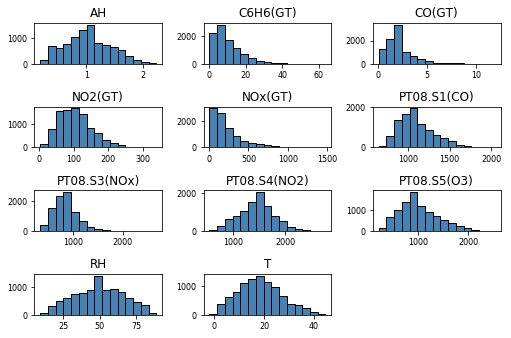

In [101]:

df_fill.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
             xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

# Multivariate analysis

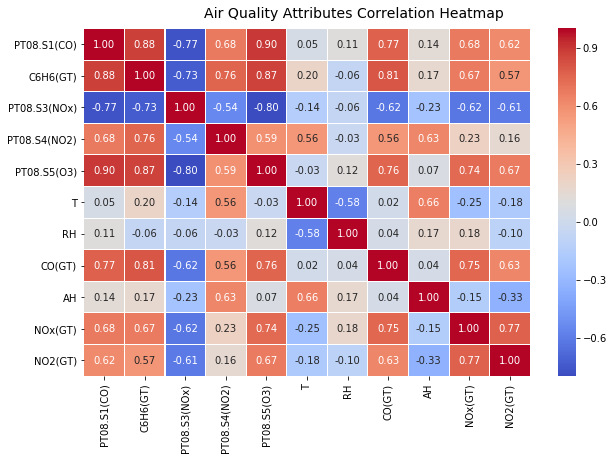

In [102]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df_fill.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Air Quality Attributes Correlation Heatmap', fontsize=14)

Visualizing two-dimensional data with pair-wise scatter plots

C:\Users\priyasathya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\priyasathya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


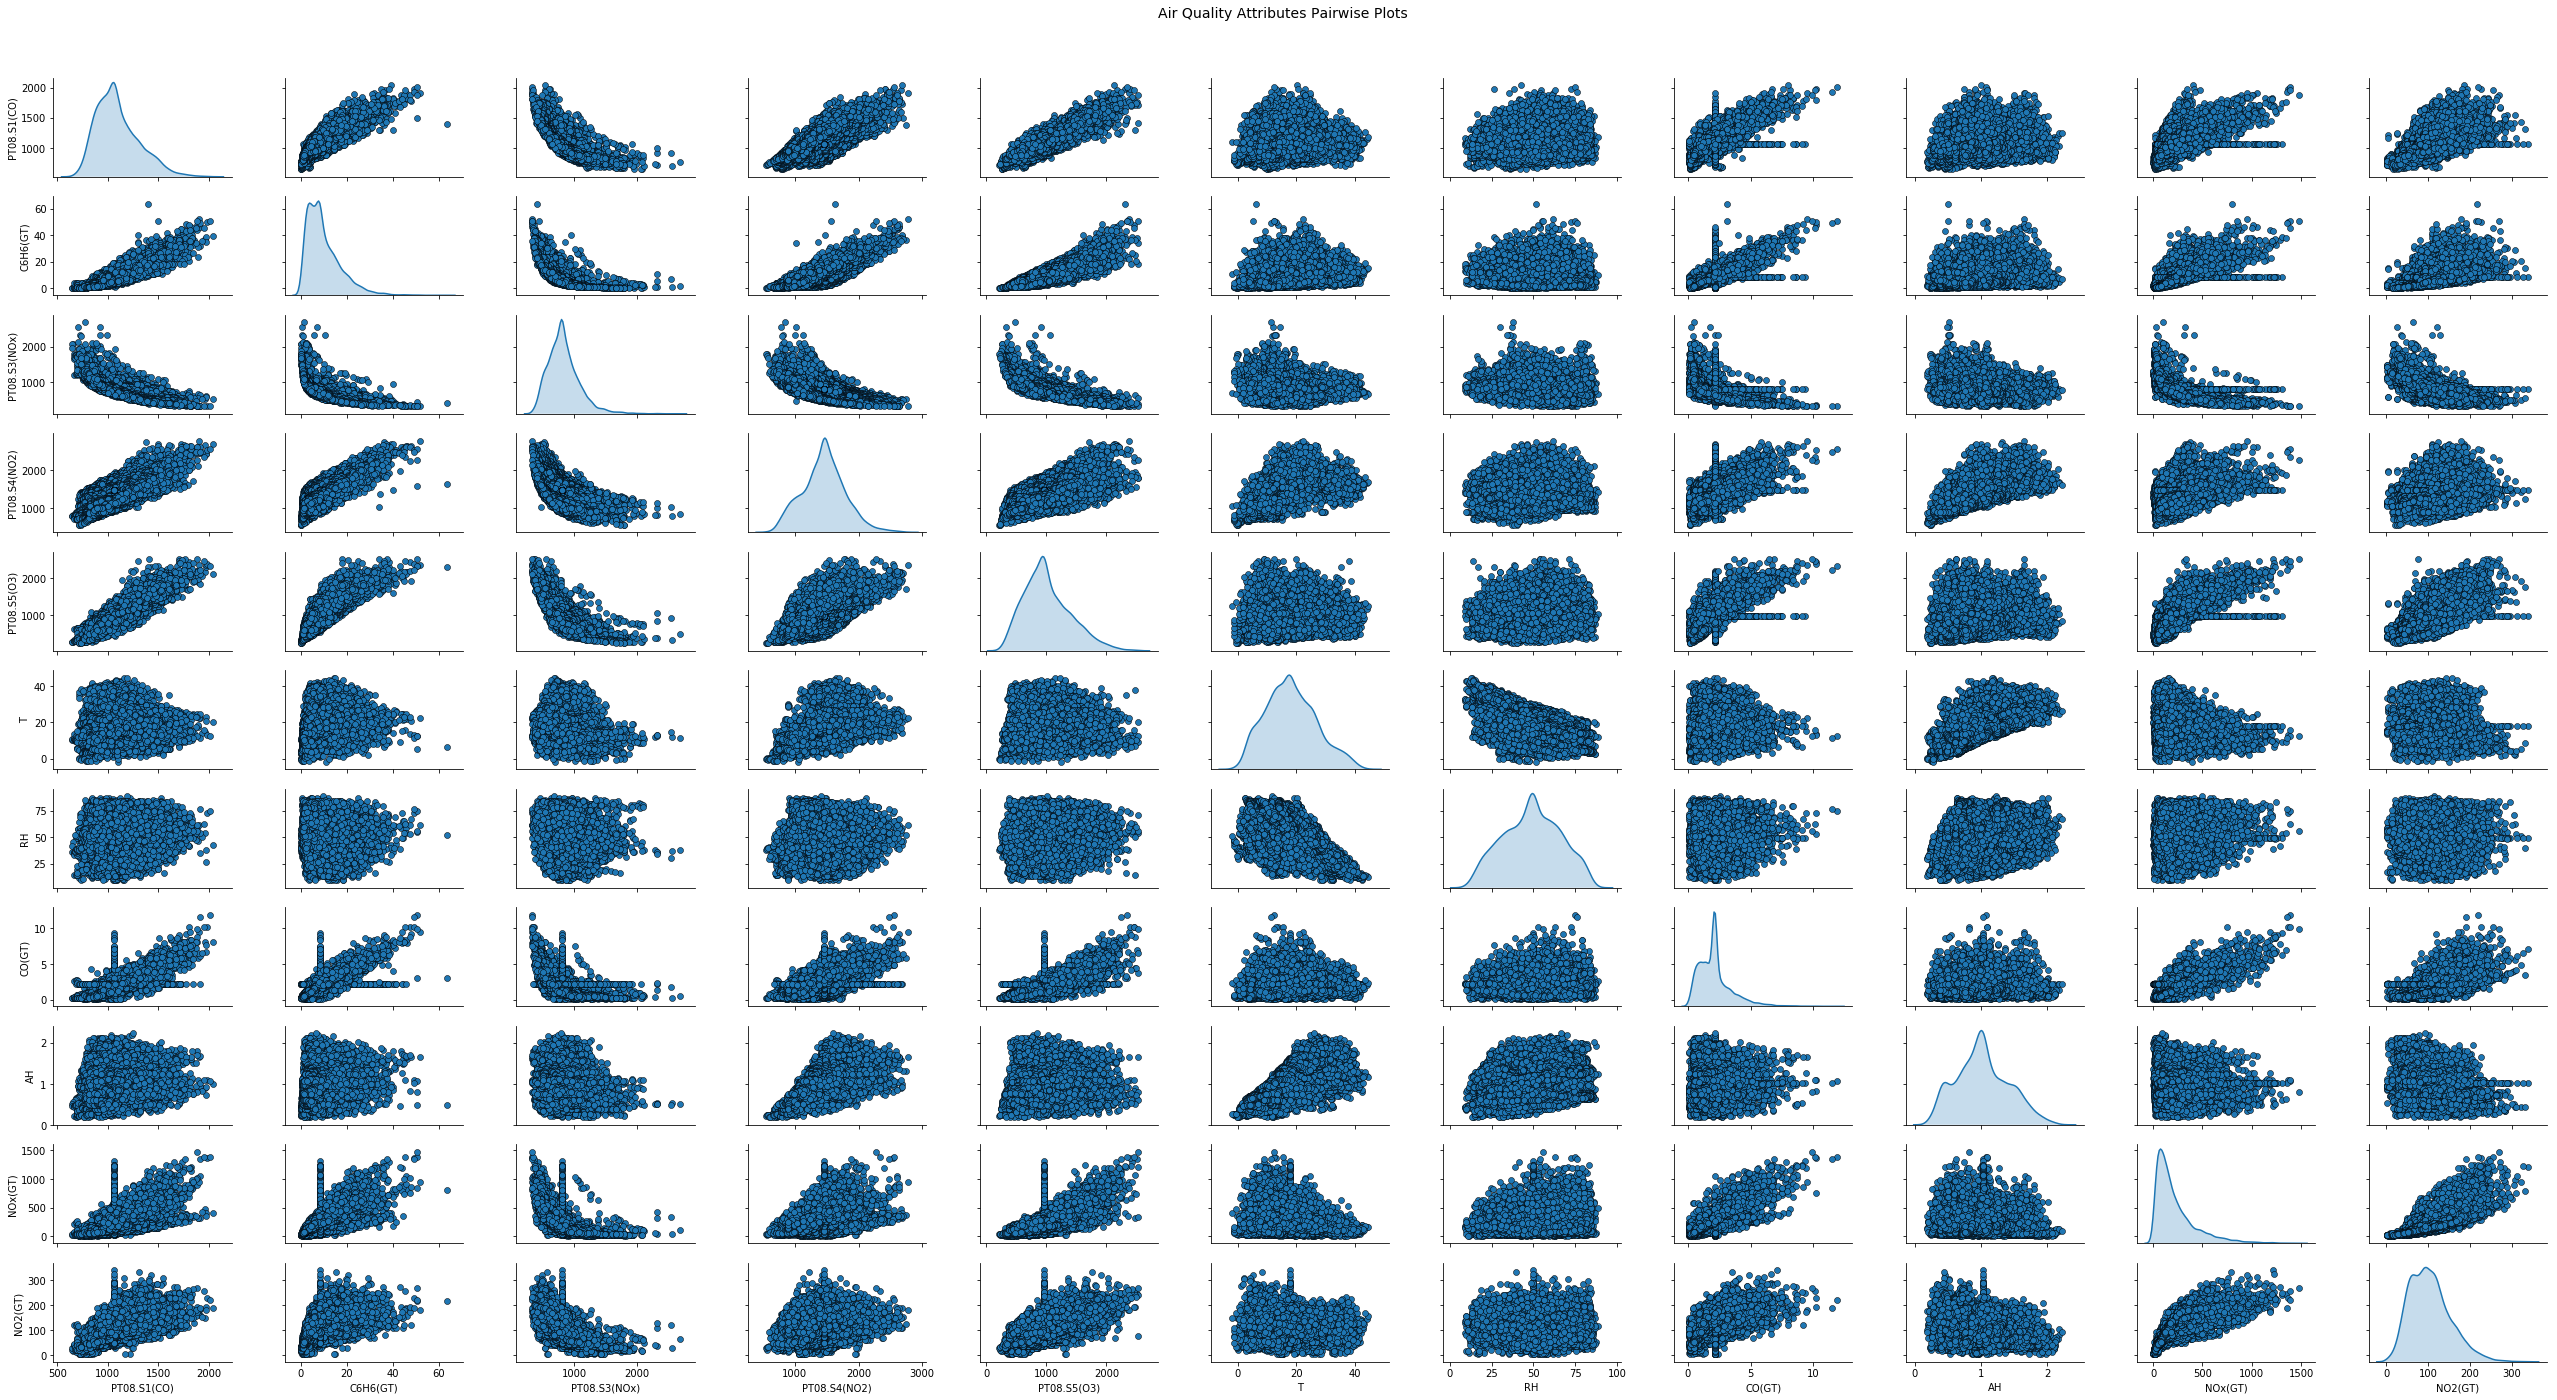

In [103]:
# Pair-wise Scatter Plots
cols = ['PT08.S1(CO)','C6H6(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','CO(GT)','AH','NOx(GT)','NO2(GT)']
pp = sns.pairplot(df_fill[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Air Quality Attributes Pairwise Plots', fontsize=14)

# Rescaling the data


for attributes with varying scale
rescale attributes into range 0-1
MinMaxScaler


In [104]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_scaled=pd.DataFrame(scale.fit_transform(df_fill),
                       columns=['PT08.S1(CO)','C6H6(GT)','PT08.S3(NOx)','PT08.S4(NO2)',
                                'PT08.S5(O3)','T','RH','CO(GT)','AH','NOx(GT)','NO2(GT)'])

# Cluster Analysis

##https://pythonprogramminglanguage.com/kmeans-elbow-method/

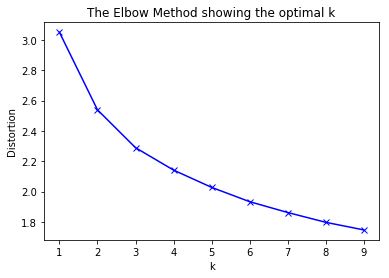

In [105]:
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
    kmeanModel.fit(df_scaled)
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



 Taking 3 as the optimal cluster.

In [106]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_scaled)
label = kmeans.predict(df_scaled)

In [107]:
df_fill['k_clust'] = label
df_scaled['k_clust'] = label

In [108]:
df_fill.head()

,PT08.S1(CO),C6H6(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,CO(GT),AH,NOx(GT),NO2(GT),k_clust
0,1360.0,11.9,1056.0,1692.0,1268.0,13.6,48.9,2.6,0.7578,166.0,113.0,1
1,1292.0,9.4,1174.0,1559.0,972.0,13.3,47.7,2.0,0.7255,103.0,92.0,0
2,1402.0,9.0,1140.0,1555.0,1074.0,11.9,54.0,2.2,0.7502,131.0,114.0,0
3,1376.0,9.2,1092.0,1584.0,1203.0,11.0,60.0,2.2,0.7867,172.0,122.0,0
4,1272.0,6.5,1205.0,1490.0,1110.0,11.2,59.6,1.6,0.7888,131.0,116.0,0


In [115]:
df_scaled.head(1)

,PT08.S1(CO),C6H6(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,CO(GT),AH,NOx(GT),NO2(GT),k_clust
0,1.228781,0.258577,0.880318,0.693887,0.633214,-0.542585,-0.020532,0.339856,-0.676404,-0.286376,0.166274,1


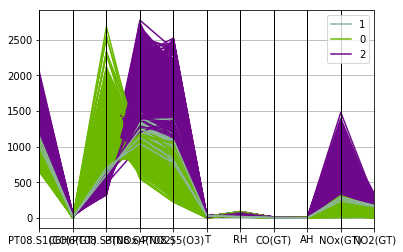

In [113]:
# plot parallel coordinates for unscaled variables
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(df_fill, 'k_clust')

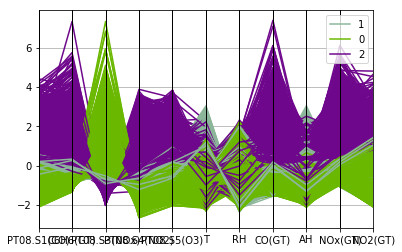

In [116]:
## plot parallel coordinates for scaled variables
pc = parallel_coordinates(df_scaled, 'k_clust')